Install the investpy library. This library will be used to get stock hystorical data.

In [ ]:
!pip3 install -q investpy

     |████████████████████████████████| 4.4MB 2.8MB/s 
     |████████████████████████████████| 245kB 46.7MB/s 
     |████████████████████████████████| 5.5MB 30.5MB/s 


Import the necessary libraries.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import investpy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from datetime import date

Defines the country in which company shares are available.

In [ ]:
country="united states"

Determine the period for historical data.

In [ ]:
years = 5

In [ ]:
initial_date = "{0}/{1}/{2}".format(date.today().day, date.today().month, date.today().year-years)

In [ ]:
final_date = date.today().strftime("%d/%m/%Y")

Ticket of some of the most popular US stocks:


*   Google: GOOGL;
*   Apple: AAPL;
*   Amazon: AMZN;
*   Facebook: FB;
*   Tesla: TSLA;
*   Berkshire Hathaway: BRKa.







In [ ]:
stock_name = "TSLA"

In [ ]:
stock_prices = investpy.get_stock_historical_data(stock_name, country=country, from_date=initial_date, to_date=final_date)

In [ ]:
stock_prices

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2015-07-30,262.69,266.94,262.11,266.79,2034560,USD
2015-07-31,267.60,269.36,265.12,266.15,2222552,USD
2015-08-03,266.29,266.71,257.07,259.99,2553474,USD
2015-08-04,260.01,266.72,258.34,266.28,2352530,USD
2015-08-05,263.58,271.00,260.40,270.13,6214319,USD
...,...,...,...,...,...,...
2020-07-24,1416.01,1465.00,1366.54,1417.00,19396616,USD
2020-07-27,1433.25,1547.13,1415.00,1539.60,16048669,USD
2020-07-28,1501.39,1564.70,1475.35,1476.49,15808700,USD


In [ ]:
historical_data = stock_prices["Close"].values

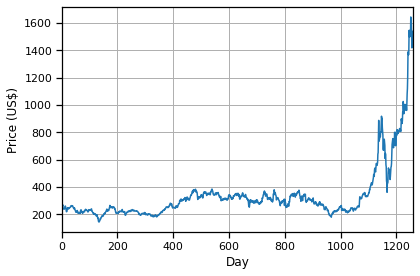

In [ ]:
plt.plot(historical_data)
plt.xlabel("Day")
plt.ylabel("Price (US$)")
plt.xlim(0,1261)
plt.grid(True)
plt.tight_layout()

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
def createModel(X_train, nUnits, hiddenLayers):
    model = Sequential()
    model.add(LSTM(units = nUnits, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    for h in range(hiddenLayers):
        model.add(LSTM(units = nUnits, return_sequences = True))
        model.add(Dropout(0.2))
    model.add(LSTM(units = nUnits))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=["mse"])
    return model

20 days.

In [ ]:
window = 20

In [ ]:
threshold = len(historical_data)-20

In [ ]:
train_data = historical_data[:threshold]

In [ ]:
test_data = historical_data[threshold:]

In [ ]:
train_data = scaler.fit_transform(train_data.reshape(-1,1))

In [ ]:
train_data

array([[0.12615271],
       [0.12549695],
       [0.11918521],
       ...,
       [0.88700357],
       [0.95919915],
       [1.        ]])

In [ ]:
X_train = []
y_train = []

In [ ]:
X_test = []
y_test = []

In [ ]:
for i in range(window, threshold):
    X_train.append(train_data[i-window:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
len(X_train)

1221

In [ ]:
test_data.shape

(20,)

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
test_data = historical_data[threshold-window:].reshape(-1,1)

In [ ]:
test_data.shape

(40, 1)

In [ ]:
test_data = scaler.fit_transform(test_data)

In [ ]:
test_data.shape

(40, 1)

In [ ]:
len(test_data)

40

In [ ]:
for x in range(window, len(test_data)):
    X_test.append(test_data[x-window:x,0])

In [ ]:
X_test = np.array(X_test)

In [ ]:
X_test

array([[0.        , 0.02733041, 0.10986104, 0.09798104, 0.20635226,
        0.13929773, 0.09105854, 0.16249262, 0.1512291 , 0.16363566,
        0.17926588, 0.17533585, 0.166885  , 0.17646606, 0.12389869,
        0.15617374, 0.12247309, 0.18618838, 0.27668182, 0.32782359],
       [0.02733041, 0.10986104, 0.09798104, 0.20635226, 0.13929773,
        0.09105854, 0.16249262, 0.1512291 , 0.16363566, 0.17926588,
        0.17533585, 0.166885  , 0.17646606, 0.12389869, 0.15617374,
        0.12247309, 0.18618838, 0.27668182, 0.32782359, 0.44216691],
       [0.10986104, 0.09798104, 0.20635226, 0.13929773, 0.09105854,
        0.16249262, 0.1512291 , 0.16363566, 0.17926588, 0.17533585,
        0.166885  , 0.17646606, 0.12389869, 0.15617374, 0.12247309,
        0.18618838, 0.27668182, 0.32782359, 0.44216691, 0.6514089 ],
       [0.09798104, 0.20635226, 0.13929773, 0.09105854, 0.16249262,
        0.1512291 , 0.16363566, 0.17926588, 0.17533585, 0.166885  ,
        0.17646606, 0.12389869, 0.15617374, 0

In [ ]:
X_test.shape

(20, 20)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(20, 20, 1)

Creates the model.

In [ ]:
regressor = createModel(X_train, 150, 4)

Train the model.

In [ ]:
regressor.fit(X_train, y_train, epochs = 60, batch_size = 10)

Epoch 1/60
123/123 [==============================] - 17s 141ms/step - loss: 0.0082 - mse: 0.0082
Epoch 2/60
123/123 [==============================] - 18s 148ms/step - loss: 0.0065 - mse: 0.0065
Epoch 3/60
123/123 [==============================] - 18s 144ms/step - loss: 0.0042 - mse: 0.0042
Epoch 4/60
123/123 [==============================] - 18s 144ms/step - loss: 0.0048 - mse: 0.0048
Epoch 5/60
123/123 [==============================] - 18s 148ms/step - loss: 0.0035 - mse: 0.0035
Epoch 6/60
123/123 [==============================] - 18s 146ms/step - loss: 0.0025 - mse: 0.0025
Epoch 7/60
123/123 [==============================] - 18s 147ms/step - loss: 0.0022 - mse: 0.0022
Epoch 8/60
123/123 [==============================] - 18s 147ms/step - loss: 0.0020 - mse: 0.0020
Epoch 9/60
123/123 [==============================] - 18s 147ms/step - loss: 0.0018 - mse: 0.0018
Epoch 10/60
123/123 [==============================] - 18s 147ms/step - loss: 0.0022 - mse: 0.0022
Epoch 11/60
123/123

After several tests, I found that the values for number of epochs, batch_size, number of neurons and hidden layers, interesting are 10, 60, 150 and 4, respectively. Clearly, other values for these hyper parameters can achieve better performance.

Save the model.

In [ ]:
regressor.save("{0}_stock_price_regressor.h5".format(stock_name))

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
predictions_inverse = scaler.inverse_transform(predictions)

Text(0, 0.5, 'Price (US$)')

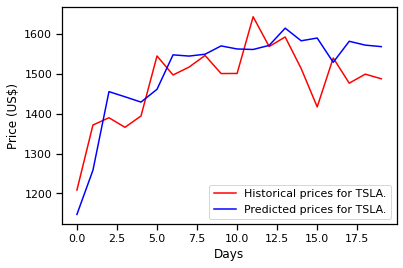

In [ ]:
plt.plot(historical_data[threshold:], color = 'red', label = 'Historical prices for {0}.'.format(stock_name))
plt.plot(predictions_inverse, color = 'blue', label = 'Predicted prices for {0}.'.format(stock_name))
plt.legend()
plt.xlabel("Days")
plt.ylabel("Price (US$)")
plt.grid(True)